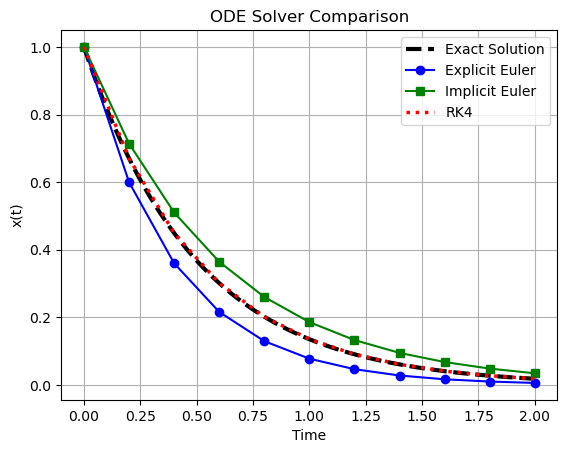

Final Errors:
Explicit Euler: 0.01226902128873419
Implicit Euler: 0.016255974144873588
RK4: 2.185812904575632e-05


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def explicit_euler(f, t0, x0, h, N):
    t = np.zeros(N+1)
    x = np.zeros(N+1)
    t[0], x[0] = t0, x0

    for n in range(N):
        t[n+1] = t[n] + h
        x[n+1] = x[n] + h * f(t[n], x[n])

    return t, x


def implicit_euler(f, t0, x0, h, N):
    t = np.zeros(N+1)
    x = np.zeros(N+1)
    t[0], x[0] = t0, x0

    for n in range(N):
        t[n+1] = t[n] + h

        # For linear test equation f(t,x) = -lambda x
        # Solve x_{n+1} = x_n + h f(t_{n+1}, x_{n+1})
        # Here we assume f(t,x) = -2x for demonstration
        # Modify if needed for general nonlinear case

        x[n+1] = x[n] / (1 + 2*h)

    return t, x


def rk4(f, t0, x0, h, N):
    t = np.zeros(N+1)
    x = np.zeros(N+1)
    t[0], x[0] = t0, x0

    for n in range(N):
        t[n+1] = t[n] + h

        k1 = f(t[n], x[n])
        k2 = f(t[n] + h/2, x[n] + h*k1/2)
        k3 = f(t[n] + h/2, x[n] + h*k2/2)
        k4 = f(t[n] + h, x[n] + h*k3)

        x[n+1] = x[n] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

    return t, x

def f(t, x):
    return -2*x

def exact_solution(t):
    return np.exp(-2*t)

# Parameters
t0 = 0
x0 = 1
h = 0.2
T = 2
N = int((T - t0)/h)

# Run solvers
t_exp, x_exp = explicit_euler(f, t0, x0, h, N)
t_imp, x_imp = implicit_euler(f, t0, x0, h, N)
t_rk4, x_rk4 = rk4(f, t0, x0, h, N)

# Exact
t_exact = np.linspace(t0, T, 1000)
x_exact = exact_solution(t_exact)

plt.figure()

plt.plot(t_exact, x_exact, 'k--', linewidth=3, label="Exact Solution")   # Black dashed
plt.plot(t_exp, x_exp, 'b-', marker='o', label="Explicit Euler")        # Blue solid
plt.plot(t_imp, x_imp, 'g-', marker='s', label="Implicit Euler")        # Green solid
plt.plot(t_rk4, x_rk4, 'r:', linewidth=2.5, label="RK4")                # Red dotted

plt.xlabel("Time")
plt.ylabel("x(t)")
plt.title("ODE Solver Comparison")
plt.legend()
plt.grid(True)
plt.show()

exact_discrete = exact_solution(t_exp)

print("Final Errors:")
print("Explicit Euler:", abs(x_exp[-1] - exact_discrete[-1]))
print("Implicit Euler:", abs(x_imp[-1] - exact_discrete[-1]))
print("RK4:", abs(x_rk4[-1] - exact_discrete[-1]))